In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

In [2]:
exe_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome' , **exe_path , headless = False)

In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
html = browser.html 
mars_temp = soup(html , 'html.parser')

In [5]:
mars_temp.head.title.text

'Mars Temperature Data'

In [6]:
df  = pd.read_html (url)

In [7]:
mars_temp_df = df[0]
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [9]:
# change datatye object to datetime 
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [10]:
#How many months exist on Mars?

no_month = mars_temp_df['month'].value_counts()
print(f"{no_month} months exist on Mars.")

4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: month, dtype: int64 months exist on Mars.


In [11]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
no_days = mars_temp_df['sol'].sum()
print(f"{no_days} days worth of data exist in the scraped dataset ." )

1896256 days worth of data exist in the scraped dataset .


In [12]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)?
coldest_month=mars_temp_df.loc[mars_temp_df['min_temp'] == mars_temp_df['min_temp'].min()]#['month']
coldest_month

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1093,1119,2015-12-09,1188,79,3,-90.0,881.0


In [13]:
warmest_month=mars_temp_df.loc[mars_temp_df['min_temp'] == mars_temp_df['min_temp'].max()]
warmest_month

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1582,1614,2017-05-10,1692,2,1,-62.0,820.0


Text(0, 0.5, 'Months')

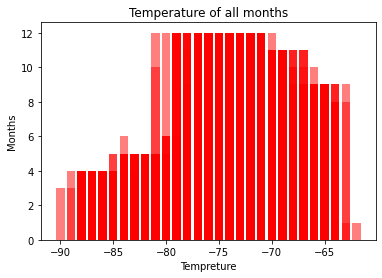

In [14]:
# Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
import matplotlib.pyplot as plot

temp= mars_temp_df['min_temp']
month= mars_temp_df['month']
plot.bar(temp , month ,  color='r', alpha=0.5, align="center")
plot.title("Temperature of all months")
plot.xlabel("Tempreture")
plot.ylabel("Months")

In [15]:
#  Which months have the lowest and the highest atmospheric pressure on Mars? 
low_prsr = mars_temp_df.loc[mars_temp_df['pressure'] == mars_temp_df['pressure'].min()]
low_prsr

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1866,1895,2018-02-27,1977,135,5,-77.0,727.0


In [16]:
high_prsr=mars_temp_df.loc[mars_temp_df['pressure'] == mars_temp_df['pressure'].max()]
high_prsr

,id,terrestrial_date,sol,ls,month,min_temp,pressure
156,80,2013-01-27,170,252,9,-66.0,925.0
157,81,2013-01-28,171,253,9,-67.0,925.0
766,785,2014-12-23,846,257,9,-74.0,925.0


Text(0, 0.5, 'Months')

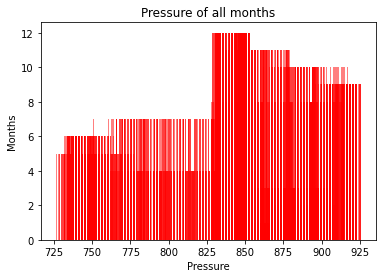

In [17]:
# Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
pressure= mars_temp_df['pressure']
month= mars_temp_df['month']
plot.bar(pressure , month ,  color='r', alpha=0.5, align="center")
plot.title("Pressure of all months")
plot.xlabel("Pressure")
plot.ylabel("Months")

In [18]:
# About how many terrestrial (Earth) days exist in a Martian year? 
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#Visually estimate the result by plotting the daily minimum temperature.

In [19]:
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


Text(0, 0.5, 'Minimum Tempreture')

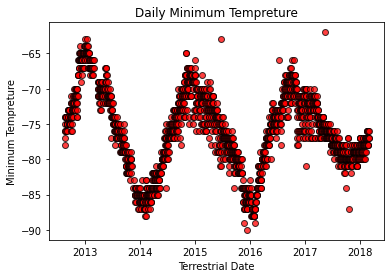

In [23]:
earth_days = mars_temp_df['terrestrial_date']
daily_temp = mars_temp_df['min_temp']
plot.scatter(earth_days , daily_temp,  marker="o", facecolors="red", edgecolors="black",
            alpha=0.75 )
plot.title("Daily Minimum Tempreture")
plot.xlabel("Terrestrial Date")
plot.ylabel("Minimum Tempreture")

In [21]:
# Export the DataFrame to a CSV file.
mars_temp_data = "Resources//mars_temp_data.csv"
mars_temp_df.to_csv(mars_temp_data , index = False)

In [22]:
browser.quit()